In [1]:
%config Completer.use_jedi = False

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

mpl.rcParams['legend.fontsize'] = 18

mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.0

cm = plt.cm.tab10

In [3]:
src = "14/src"
name = "cache"
methods = ["get_order_1", "get_order_2"]

data = pd.read_csv (name +".log", sep='\s+', names=["line_size", "n", *methods], index_col=["line_size", "n"])

mean = data.groupby(["line_size", "n"]).mean().reset_index()
print(mean)
print("line_size:", mean.groupby("line_size").first().index.values)

     line_size        n  get_order_1  get_order_2
0            8      200       0.0160       0.0160
1            8      500       0.0428       0.0438
2            8     1000       0.0776       0.0814
3            8     5000       0.5326       0.4922
4            8    10000       1.0782       1.1598
..         ...      ...          ...          ...
127       8196   100000      21.7460       7.6086
128       8196   200000      56.3428      16.6158
129       8196   500000     179.5682      44.1254
130       8196   800000     342.1250      72.3674
131       8196  1000000     444.8362      91.4000

[132 rows x 4 columns]
line_size: [   8   12   20   36   68  132  260  516 1028 2052 4100 8196]


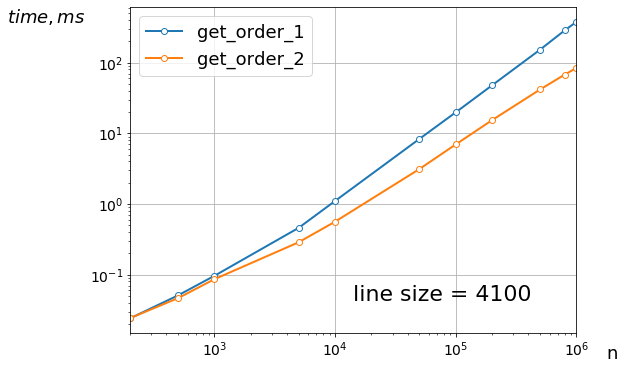

In [4]:
line_size = 4100

slice = mean[mean["line_size"] == line_size]

ax = slice.plot(x="n", y=methods, logx=True, logy=True, style="-o",
                figsize=(8,6), grid=True, legend=True, markerfacecolor="white")
ax.set_ylabel(r"$time, ms$", position=(None,1.0),
              rotation=0, verticalalignment="top", horizontalalignment="right")
ax.set_xlabel(r"n", position=(1.08,None), verticalalignment="bottom")
ax.text(0.5, 0.1, "line size = {}".format(line_size),
        fontsize=22, transform=ax.transAxes)

ax.figure.savefig("cache_impact_by_n", bbox_inches = "tight")

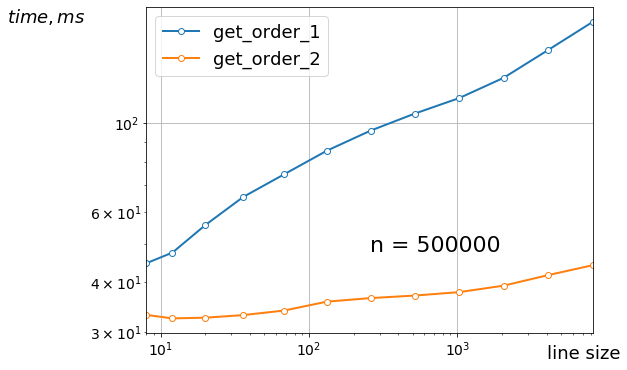

In [5]:
n = 500_000

slice = mean[mean["n"] == n]

ax = slice.plot(x="line_size", y=methods, logx=True, logy=True, style="-o",
                figsize=(8,6), grid=True, legend=True, markerfacecolor="white")
ax.set_ylabel(r"$time, ms$", position=(None,1.0),
              rotation=0, verticalalignment="top", horizontalalignment="right")
ax.set_xlabel(r"line size", position=(0.98,None), verticalalignment="bottom")
ax.text(0.5, 0.25, "n = {}".format(n),
        fontsize=22, transform=ax.transAxes)

ax.figure.savefig("cache_impact_by_line_size", bbox_inches = "tight")

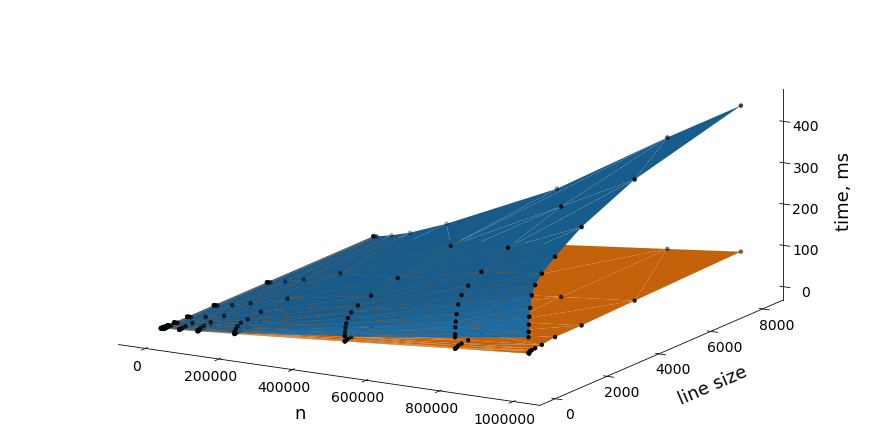

In [6]:
X, Y = mean["n"], mean["line_size"]
fig = plt.figure(figsize=(12,6))
ax = Axes3D(fig, proj_type='ortho')
for func in methods:
    ax.plot_trisurf(X, Y, mean[func], linewidth=0)
    ax.scatter(X, Y, mean[func], linewidth=0, c='k')

ax.set_xlabel("n", labelpad=20)
ax.set_ylabel("line size", labelpad=20)
ax.set_zlabel("time, ms", labelpad=10)

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0))

ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# ax.view_init(elev=20, azim=-10)

ax.figure.savefig("cache_impact", bbox_inches = "tight")